In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import scipy 
import re
from scipy import stats
from tqdm.notebook import tqdm
import time 
from scipy.stats import zscore
import matplotlib.patches as mpatches
from scipy.io.wavfile import read
import textgrid
import subprocess
import shutil
import sys

import plotly.express as px
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [2]:
# duration analysis for vowel phonemes vs. consonant phonemes

patients_path = r"C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop"

data = scipy.io.loadmat(os.path.join(patients_path, "S14", "Trials.mat"))
columns = data["Trials"].dtype.names
print(columns)
print(type(columns))

#print(data["Trials"]['Auditory'])

('Subject', 'Trial', 'Rec', 'Day', 'FilenamePrefix', 'Auditory', 'ResponseOnset', 'ResponseOffset', 'Spike', 'SpikeResponseOnset', 'SpikeResponseOffset', 'phon1Onset', 'phon1Offset', 'phon2Onset', 'phon2Offset', 'phon3Onset', 'phon3Offset', 'phon1', 'phon2', 'phon3')
<class 'tuple'>


In [3]:
# let's arbitrarily iterate over trials and print the column with last phoneme

columns = ('Subject', 'Trial', 'Rec', 'Day', 'FilenamePrefix', 'Auditory', 'ResponseOnset', 'ResponseOffset', 'Spike', 'SpikeResponseOnset', 'SpikeResponseOffset', 'phon1Onset', 'phon1Offset', 'phon2Onset', 'phon2Offset', 'phon3Onset', 'phon3Offset', 'phon1', 'phon2', 'phon3')

# iterate over all rows in data["Trials"]

for i in range(data["Trials"].shape[1]):
    row = data["Trials"][0][i]
    #print(row)
    print(row["phon1"][0][0][0][0])
    print(row["phon2"][0][0][0][0])
    print(row["phon3"][0][0][0][0])

print(data['Trials'].shape[1])
row = data['Trials'][0][22]
print(row)
print(row[0][0])
print(row['phon2'])
print(row['phon2'][0])
print(row['phon2'][0][0])
print(row['phon2'][0][0][0])
print(row['phon2'][0][0][0][0])
s = row['phon2'][0][0][0]
v = row['phon2'][0][0][0][0][0][0]
print(s,v)
print(s==v)
print(row["ResponseOnset"][0])
print(row["ResponseOffset"][0])
print(row["phon2Onset"][0])
print(row["phon2Offset"][0][0])
print(type(row['phon2'][0][0][0]))


b
a
k
nan
nan
nan
k
a
b
g
a
b
nan
nan
nan
i
p
u
a
g
a
a
k
a
g
a
v
u
v
a
a
p
i
p
u
p
a
k
a
g
i
p
u
p
i
g
u
b
g
a
k
g
i
g
a
b
i
u
p
u
a
b
a
u
k
a
v
u
k
v
u
g
a
b
a
a
v
a
a
k
u
k
u
b
g
a
b
a
b
i
i
k
a
i
k
a
p
u
k
g
a
v
v
a
g
u
g
a
g
a
p
nan
nan
nan
k
u
g
u
g
a
b
a
b
i
v
a
nan
nan
nan
i
b
u
i
v
u
b
a
k
k
a
g
a
b
u
p
a
k
v
a
k
v
i
p
u
b
a
nan
nan
nan
nan
nan
nan
nan
nan
nan
g
a
k
u
v
i
a
b
i
g
i
p
b
u
p
a
b
i
v
a
k
p
a
k
p
a
p
k
a
b
i
b
u
u
p
u
k
u
b
k
u
g
a
v
a
b
a
k
a
k
u
g
u
b
a
b
a
g
a
b
u
b
a
k
a
g
i
b
a
u
p
i
i
v
u
v
u
k
a
k
a
a
k
a
p
u
p
a
p
i
g
a
v
b
a
k
g
i
g
v
u
g
a
b
a
g
a
v
b
a
b
a
g
a
i
k
a
i
k
a
v
i
p
a
v
a
i
p
u
p
u
k
u
k
a
v
a
g
u
b
a
u
v
a
g
a
b
a
k
u
a
k
u
p
u
p
g
a
b
g
u
b
g
a
b
a
p
i
u
p
i
b
a
k
v
u
g
a
b
a
v
a
g
u
g
a
b
a
b
a
v
a
i
v
a
v
i
p
u
k
a
p
a
p
i
k
a
a
b
i
g
a
k
p
u
k
k
u
b
v
a
k
g
a
b
p
a
v
b
u
p
a
k
a
b
a
k
a
v
a
a
k
a
i
p
u
u
p
u
k
a
b
i
k
a
a
b
a
a
b
u
u
b
a
a
b
u
u
v
a
u
v
i
a
g
a
k
u
g
i
b
u
k
a
g
v
u
k
g
i
g
i
v
u
p
a
k
u
b
a
g
i
p
156
(array(['S14'], dt

In [4]:
# let's create a function that goes to the Trials.mat files of each patient
# 1. loads the .mat file
# ('Subject', 'Trial', 'Rec', 'Day', 'FilenamePrefix', 'Auditory', 'ResponseOnset', 'ResponseOffset', 'Spike', 'SpikeResponseOnset', 'SpikeResponseOffset', 
# 'phon1Onset', 'phon1Offset', 'phon2Onset', 'phon2Offset', 'phon3Onset', 'phon3Offset', 'phon1', 'phon2', 'phon3')
# 2. iterates over rows, gets, 'ResponseOnset, ResponseOffset, 
# and 'phon1Onset', 'phon1Offset', 'phon2Onset', 'phon2Offset', 'phon3Onset', 'phon3Offset', 'phon1', 'phon2', 'phon3'
# 3. adds the three phonemes together to form the word. 
# 4. appends onset offset word to a matrix (for later to be converted to a text file with headers)
# 5. appends [phon1onset, phon1offset, phon1] for each phoneme to  a matrix (for later to be ....)
# that's it!!! let's get working 
# before all this, let's create a function that discerns the type of phoneme (vowel vs. consonant)

def phoneme_type(phoneme):
    consonants = ['b', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'r', 's', 't', 'v', 'w', 'y', 'z']
    if phoneme.lower() in consonants:
        return "Consonant"
    else:
        return "Vowel"

def mat_to_text(patient):
    Nans = 0
    data = scipy.io.loadmat(os.path.join(patients_path, patient, "Trials.mat"))
    columns = data["Trials"].dtype.names

    words = []
    phonemes = []

    for i in range(data["Trials"].shape[1]):
        row = data["Trials"][0][i]
        phon1, phon2, phon3 = row["phon1"][0][0][0], row["phon2"][0][0][0], row["phon3"][0][0][0]
        word = phon1 + phon2 + phon3
        start, end = row["ResponseOnset"][0][0], row["ResponseOffset"][0][0]
        # convert from samples to seconds
        sampling_rate = 30000
        start, end = start/sampling_rate, end/sampling_rate
        #print(f"Start is {start} and end is {end} for word {word} in row {i} from patient {patient}")
        # count nans 
        if np.isnan(start) or np.isnan(end):
            print(f"Skipping row {i} from patient {patient} because it has a NaN value!!!")
            Nans += 1
            continue
        words.append([start, end, word])
        # would be nice if we also discern phoneme type (Vowel vs. Consonant) and add that to the phoneme matrix
        #print(f'This is row {i}')
        #print(type(phon1), type(phon2), type(phon3))
        #print(phon1, phon2, phon3)
        # I think we should skip the row if any of the phonemes has a NaN value or is not type str
        good_type = np.str_
        if type(phon1) != good_type or type(phon2) != good_type or type(phon3) != good_type:
            print(f"Skipping row {i} from patient {patient} because it has a NaN value!!!")
            continue
        phon1_s, phon1_e = row["phon1Onset"][0][0]/sampling_rate, row["phon1Offset"][0][0]/sampling_rate
        phon2_s, phon2_e = row["phon2Onset"][0][0]/sampling_rate, row["phon2Offset"][0][0]/sampling_rate
        phon3_s, phon3_e = row["phon3Onset"][0][0]/sampling_rate, row["phon3Offset"][0][0]/sampling_rate
        # add phoneme onset, offset, phoneme, phoneme type, and position of the phoneme in the word (1, 2, 3) to the phoneme matrix
        phonemes.append([phon1_s, phon1_e, phon1, phoneme_type(phon1), 'P1'])
        phonemes.append([phon2_s, phon2_e, phon2, phoneme_type(phon2), 'P2'])
        phonemes.append([phon3_s, phon3_e, phon3, phoneme_type(phon3), 'P3'])
        
    words_df = pd.DataFrame(words, columns=["Start", "End", "Word"]).dropna()
    phonemes_df = pd.DataFrame(phonemes, columns=["Start", "End", "Phoneme", "Type", "Position"])
    words_df.to_csv(os.path.join(patients_path, patient, "kumar_words.txt"), sep="\t", header=None, index=None, float_format='%.10f')
    phonemes_df.to_csv(os.path.join(patients_path, patient, "kumar_phonemes.txt"), sep="\t", header=None, index=None, float_format='%.10f')

    
    print(f"Number of NaNs in {patient} is {Nans}")
    return words_df, phonemes_df

In [5]:
patients_path = r"C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop"
pattern = re.compile(r"S\d+")
patients = [f for f in os.listdir(patients_path) if pattern.match(f)]
print(patients)
kumar_phonemes = []
for patient in tqdm(patients, desc="Patients", ascii=False, ncols=1000, bar_format='{l_bar}{bar}{r_bar}'):
    words_df, phonemes_df = mat_to_text(patient)
    kumar_phonemes.append(phonemes_df)

['S14', 'S22', 'S23', 'S26', 'S33']


Patients:   0%|                                                                                               …

Skipping row 1 from patient S14 because it has a NaN value!!!
Skipping row 4 from patient S14 because it has a NaN value!!!
Skipping row 37 from patient S14 because it has a NaN value!!!
Skipping row 42 from patient S14 because it has a NaN value!!!
Skipping row 52 from patient S14 because it has a NaN value!!!
Skipping row 53 from patient S14 because it has a NaN value!!!
Skipping row 54 from patient S14 because it has a NaN value!!!
Number of NaNs in S14 is 7
Skipping row 0 from patient S22 because it has a NaN value!!!
Number of NaNs in S22 is 1
Skipping row 6 from patient S23 because it has a NaN value!!!
Skipping row 32 from patient S23 because it has a NaN value!!!
Skipping row 33 from patient S23 because it has a NaN value!!!
Number of NaNs in S23 is 3
Skipping row 2 from patient S26 because it has a NaN value!!!
Skipping row 3 from patient S26 because it has a NaN value!!!
Skipping row 73 from patient S26 because it has a NaN value!!!
Skipping row 82 from patient S26 because it

In [6]:
mfa_phonemes = []
positions = ['P1', 'P2', 'P3']
for patient in tqdm(patients, desc="Patients", ascii=False, ncols=1000, bar_format='{l_bar}{bar}{r_bar}'):
    mfa = pd.read_csv(os.path.join(patients_path, patient, "mfa", "mfa_resp_phones.txt"), sep="\t", header=None)
    mfa.columns = ["Start", "End", "Phoneme"]
    mfa["Type"] = mfa["Phoneme"].apply(phoneme_type)
    mfa["Position"] = np.tile(positions, len(mfa)//3)
    mfa_phonemes.append(mfa)



Patients:   0%|                                                                                               …

In [7]:
# i guess now we can append all the phonemes to a single df, from which we can calculate 
# duration for each row. then plot from MFA and Kumar two distributions. 
kumar_phonemes_df = pd.concat(kumar_phonemes)
mfa_phonemes_df = pd.concat(mfa_phonemes)
# print head from each 
print(kumar_phonemes_df.head())
print(mfa_phonemes_df.head())
print(kumar_phonemes_df.shape)
print(mfa_phonemes_df.shape)

      Start         End Phoneme       Type Position
0  383.7540  383.827500       b  Consonant       P1
1  383.8275  383.940900       a      Vowel       P2
2  383.9409  383.952800       k  Consonant       P3
3  391.4263  391.574400       k  Consonant       P1
4  391.5744  391.779433       a      Vowel       P2
      Start       End Phoneme       Type Position
0  383.7640  383.7940       B  Consonant       P1
1  383.7940  383.9040     AA1      Vowel       P2
2  383.9040  384.0340       K  Consonant       P3
3  388.2803  388.9303     UH1      Vowel       P1
4  388.9303  389.4003       V  Consonant       P2
(1983, 5)
(2028, 5)


In [8]:
# create a column that calculates the duration of each phoneme
kumar_phonemes_df["Duration"] = kumar_phonemes_df["End"] - kumar_phonemes_df["Start"]
mfa_phonemes_df["Duration"] = mfa_phonemes_df["End"] - mfa_phonemes_df["Start"]
# print head from each
print(kumar_phonemes_df.head())
print(mfa_phonemes_df.head())

      Start         End Phoneme       Type Position  Duration
0  383.7540  383.827500       b  Consonant       P1  0.073500
1  383.8275  383.940900       a      Vowel       P2  0.113400
2  383.9409  383.952800       k  Consonant       P3  0.011900
3  391.4263  391.574400       k  Consonant       P1  0.148100
4  391.5744  391.779433       a      Vowel       P2  0.205033
      Start       End Phoneme       Type Position  Duration
0  383.7640  383.7940       B  Consonant       P1      0.03
1  383.7940  383.9040     AA1      Vowel       P2      0.11
2  383.9040  384.0340       K  Consonant       P3      0.13
3  388.2803  388.9303     UH1      Vowel       P1      0.65
4  388.9303  389.4003       V  Consonant       P2      0.47


In [9]:
kumar_phonemes_df["Source"] = "Kumar"
mfa_phonemes_df["Source"] = "MFA"
merged_df = pd.concat([kumar_phonemes_df, mfa_phonemes_df])

print(merged_df.head())

      Start         End Phoneme       Type Position  Duration Source
0  383.7540  383.827500       b  Consonant       P1  0.073500  Kumar
1  383.8275  383.940900       a      Vowel       P2  0.113400  Kumar
2  383.9409  383.952800       k  Consonant       P3  0.011900  Kumar
3  391.4263  391.574400       k  Consonant       P1  0.148100  Kumar
4  391.5744  391.779433       a      Vowel       P2  0.205033  Kumar


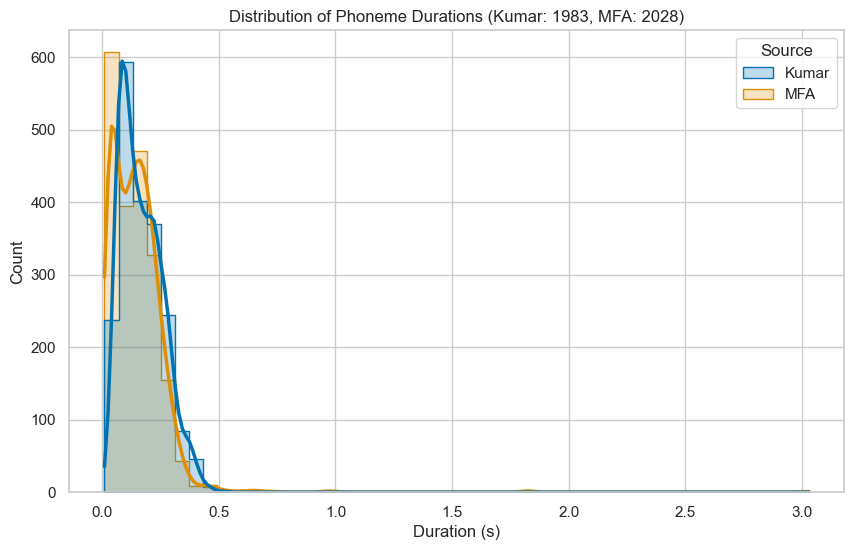

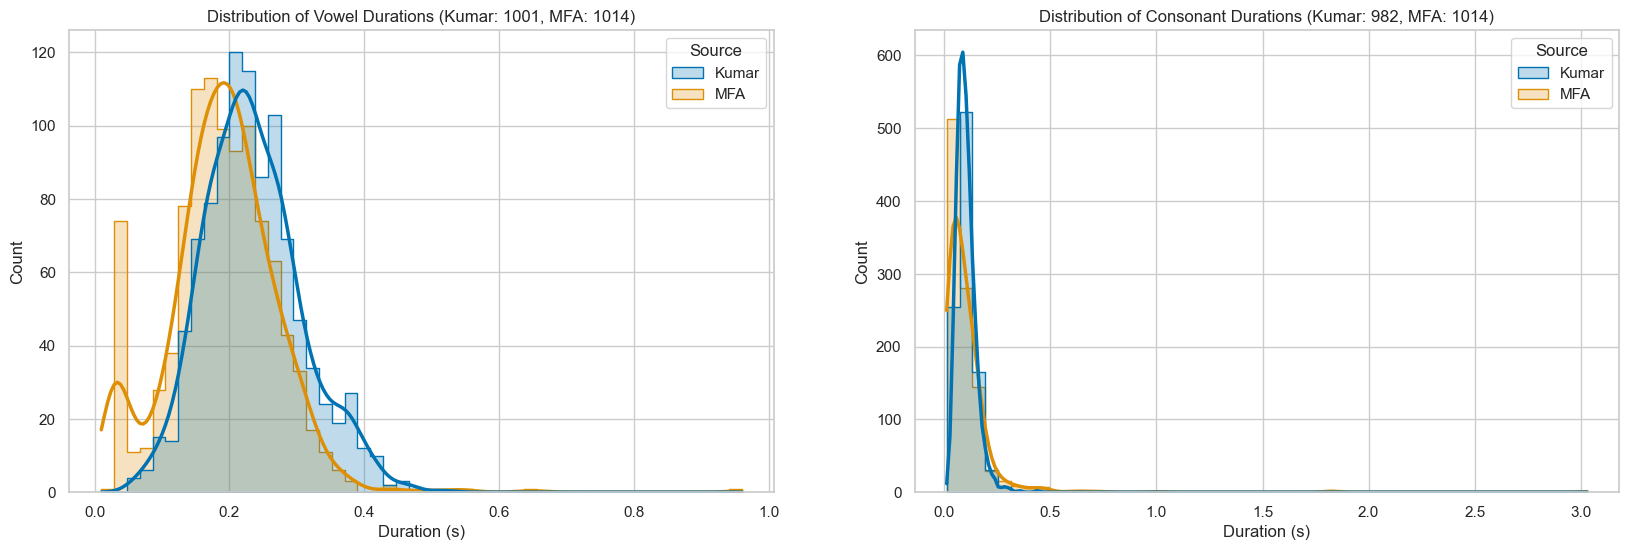

In [10]:
# plot the distribution of durations for both sources
stats_path = os.path.join(patients_path, "May 29", "stats_plots2")
if not os.path.exists(stats_path):
    os.makedirs(stats_path)
# plot the distribution of durations for both sources
sns.set(style="whitegrid")
sns.set_palette("colorblind")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})    
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(merged_df, x="Duration", hue="Source", kde=True, bins=50, ax=ax, element="step")
num_kumar = merged_df[merged_df["Source"] == "Kumar"].shape[0]
num_mfa = merged_df[merged_df["Source"] == "MFA"].shape[0]
ax.set_title(f"Distribution of Phoneme Durations (Kumar: {num_kumar}, MFA: {num_mfa})")
ax.set_xlabel("Duration (s)")
ax.set_ylabel("Count")
plt.savefig(os.path.join(stats_path, "phoneme_durations.png"))
plt.show()

# repeat the same for vowels and consonants 
vowels = merged_df[merged_df["Type"] == "Vowel"]
consonants = merged_df[merged_df["Type"] == "Consonant"]

fig, ax = plt.subplots(1, 2, figsize=(20, 6))
sns.histplot(vowels, x="Duration", hue="Source", kde=True, bins=50, ax=ax[0], element="step")
num_kumar_vowels = vowels[vowels["Source"] == "Kumar"].shape[0]
num_mfa_vowels = vowels[vowels["Source"] == "MFA"].shape[0]
ax[0].set_title(f"Distribution of Vowel Durations (Kumar: {num_kumar_vowels}, MFA: {num_mfa_vowels})")
ax[0].set_xlabel("Duration (s)")
ax[0].set_ylabel("Count")
sns.histplot(consonants, x="Duration", hue="Source", kde=True, bins=50, ax=ax[1], element="step")
num_kumar_consonants = consonants[consonants["Source"] == "Kumar"].shape[0]
num_mfa_consonants = consonants[consonants["Source"] == "MFA"].shape[0]
ax[1].set_title(f"Distribution of Consonant Durations (Kumar: {num_kumar_consonants}, MFA: {num_mfa_consonants})")
ax[1].set_xlabel("Duration (s)")
ax[1].set_ylabel("Count")
plt.savefig(os.path.join(stats_path, "phoneme_durations_vowels_consonants.png"))
plt.show()

### Even though both distributions look normally distributed... more robust test


In [11]:
# let's do an F-test to see if the variances are equal of Kumar and MFA

kumar_var = np.var(kumar_phonemes_df["Duration"])
mfa_var = np.var(mfa_phonemes_df["Duration"])

print(f"Variance of Kumar is {kumar_var} and variance of MFA is {mfa_var}")

num_kumar = kumar_phonemes_df.shape[0]
num_mfa = mfa_phonemes_df.shape[0]
print(f"Number of Kumar phonemes is {num_kumar} and number of MFA phonemes is {num_mfa}")

F = kumar_var/mfa_var
df1 = num_kumar - 1
df2 = num_mfa - 1
p_value = 1 - stats.f.cdf(F, df1, df2)
print(f"F-statistic is {F} and p-value is {p_value}")

# levene's test

stat, p = stats.levene(kumar_phonemes_df["Duration"], mfa_phonemes_df["Duration"])
print(f"Levene's test statistic is {stat} and p-value is {p}")



Variance of Kumar is 0.008018299921982783 and variance of MFA is 0.01615486551202259
Number of Kumar phonemes is 1983 and number of MFA phonemes is 2028
F-statistic is 0.49633962696968886 and p-value is 1.0
Levene's test statistic is 2.754387773349175 and p-value is 0.09706614985155539


In [12]:
# phonemes = array(['b', 'a', 'k', 'g', 'ae', 'i', 'p', 'u', 'v', 'B', 'AA1', 'K',
#       'UH1', 'V', 'IY0', 'G', 'AE1', 'AE0', 'IY1', 'P', 'UH0', 'EH1',
#       'AA0', 'EH0'], dtype=object)

# we need to do a mapping from kumar phonemes to MFA phonemes
# kumar phonemes = ['b', 'a', 'k', 'g', 'ae', 'i', 'p', 'u', 'v']
# MFA phonemes = ['B', 'AA1', 'K', 'UH1', 'V', 'IY0', 'G', 'AE1', 'AE0', 'IY1', 'P', 'UH0', 'EH1', 'AA0', 'EH0']

# let's create a dictionary that maps kumar phonemes to MFA phonemes
mfa_to_kumar = {
    'B': 'b',
    'AA1': 'a',
    'K': 'k',
    'G': 'g',
    'AE1': 'ae',
    'IY0': 'i',
    'P': 'p',
    'UH1': 'u',
    'V': 'v',
    'IY1': 'i',
    'AE0': 'ae',
    'UH0': 'u',
    'EH1': 'e',
    'AA0': 'a',
    'EH0': 'e'
}



In [13]:
kumar_phonemes_df

Start         End Phoneme       Type Position  Duration Source
0    383.754000  383.827500       b  Consonant       P1  0.073500  Kumar
1    383.827500  383.940900       a      Vowel       P2  0.113400  Kumar
2    383.940900  383.952800       k  Consonant       P3  0.011900  Kumar
3    391.426300  391.574400       k  Consonant       P1  0.148100  Kumar
4    391.574400  391.779433       a      Vowel       P2  0.205033  Kumar
..          ...         ...     ...        ...      ...       ...    ...
151  208.002800  208.250500       a      Vowel       P2  0.247700  Kumar
152  208.250500  208.429400       b  Consonant       P3  0.178900  Kumar
153  211.828633  211.891533       g  Consonant       P1  0.062900  Kumar
154  211.891533  212.105833      ae      Vowel       P2  0.214300  Kumar
155  212.105833  212.233600       b  Consonant       P3  0.127767  Kumar

[1983 rows x 7 columns]

In [14]:
# let's change the phonemes in mfa_phonemes_df to kumar phonemes

mfa_phonemes_df["Phoneme"] = mfa_phonemes_df["Phoneme"].apply(lambda x: mfa_to_kumar[x])
mfa_phonemes_df.head()

Start       End Phoneme       Type Position  Duration Source
0  383.7640  383.7940       b  Consonant       P1      0.03    MFA
1  383.7940  383.9040       a      Vowel       P2      0.11    MFA
2  383.9040  384.0340       k  Consonant       P3      0.13    MFA
3  388.2803  388.9303       u      Vowel       P1      0.65    MFA
4  388.9303  389.4003       v  Consonant       P2      0.47    MFA

In [15]:
# let's repeat with tabulating the results 

results = []
for phon in kumar_phonemes_df["Phoneme"].unique():
    kumar_phon = kumar_phonemes_df[kumar_phonemes_df["Phoneme"] == phon]
    mfa_phon = mfa_phonemes_df[mfa_phonemes_df["Phoneme"] == phon]
    stat, p = stats.levene(kumar_phon["Duration"], mfa_phon["Duration"])
    kum_var = np.var(kumar_phon["Duration"])
    mfa_var = np.var(mfa_phon["Duration"])
    results.append([phon, stat, p, kum_var, mfa_var])  
results_df = pd.DataFrame(results, columns=["Phoneme", "Stat", "P", "Kumar Var", "MFA Var"])
results_df

Phoneme       Stat         P  Kumar Var   MFA Var
0       b   7.989112  0.004915   0.001876  0.062594
1       a   1.057264  0.304293   0.006471  0.005795
2       k  22.706874  0.000003   0.002650  0.004280
3       g   0.811306  0.368272   0.001928  0.003031
4      ae   2.227450  0.136370   0.004490  0.005929
5       i   0.525220  0.469098   0.004541  0.008195
6       p  11.544083  0.000758   0.001441  0.025295
7       u   3.706951  0.054687   0.004280  0.006441
8       v  18.358624  0.000024   0.001727  0.008336

In [16]:


# let's do this based on phoneme type (vowel vs. consonant)

results = []
for phon in kumar_phonemes_df["Type"].unique():
    kumar_phon = kumar_phonemes_df[kumar_phonemes_df["Type"] == phon]
    mfa_phon = mfa_phonemes_df[mfa_phonemes_df["Type"] == phon]
    stat, p = stats.levene(kumar_phon["Duration"], mfa_phon["Duration"])
    kum_var = np.var(kumar_phon["Duration"])
    mfa_var = np.var(mfa_phon["Duration"])
    results.append([phon, stat, p, kum_var, mfa_var])
results_df = pd.DataFrame(results, columns=["Type", "Stat", "P", "Kumar Var", "MFA Var"])
results_df

    

Type       Stat             P  Kumar Var   MFA Var
0  Consonant  37.504110  1.095808e-09   0.002009  0.021728
1      Vowel   1.959991  1.616684e-01   0.005213  0.006720

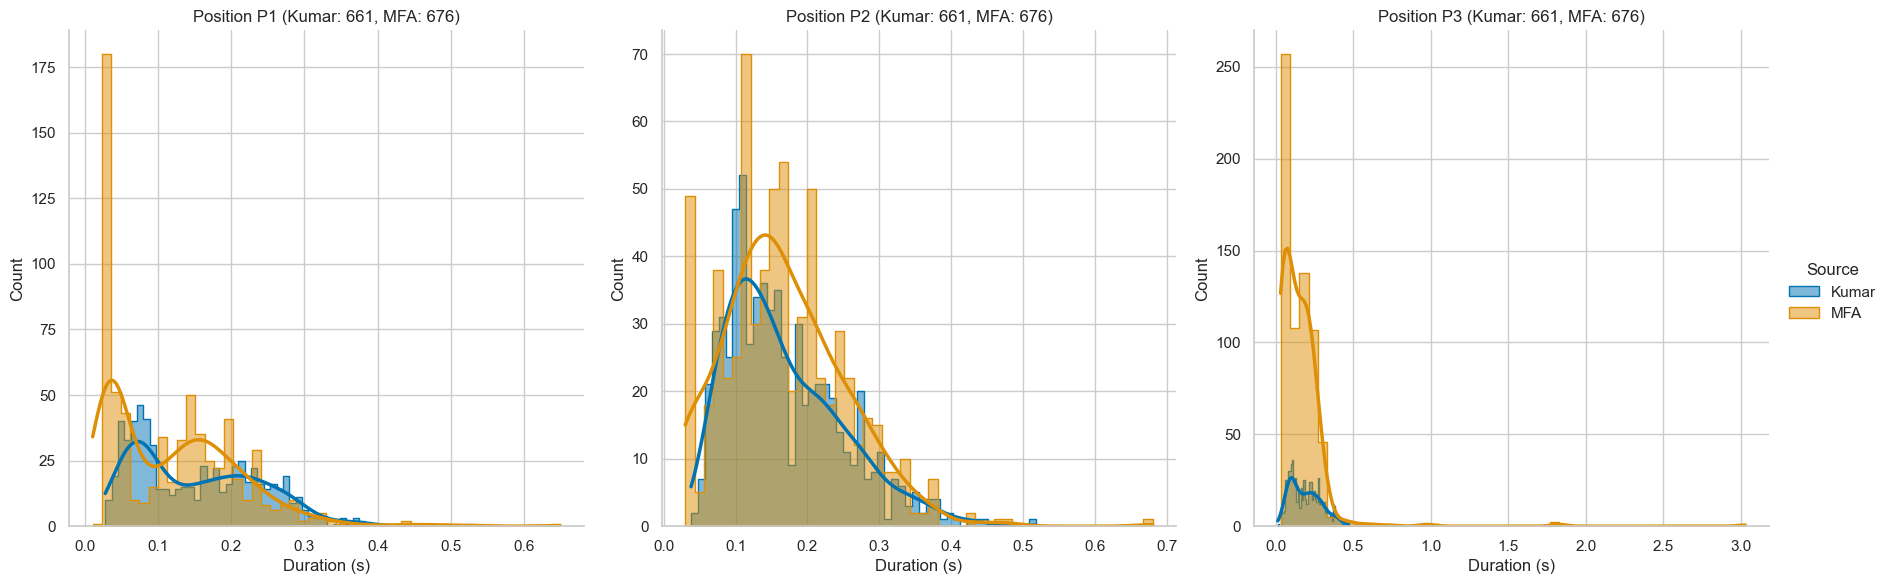

In [17]:
# repeat for position instead of type via a facet grid
sns.set(style="whitegrid")
sns.set_palette("colorblind")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})   
facet = sns.FacetGrid(merged_df, col="Position", hue="Source", sharex=False, sharey=False, height=6, aspect=1)
facet.map(sns.histplot, "Duration", kde=True, bins=50, element="step")
num_for_position = merged_df.groupby(["Position", "Source"]).size().reset_index(name="Count").pivot(index="Source", columns="Position", values="Count").to_dict()
# add titles to each facet with the number of phonemes in each position for each source 
for ax, (position, kummfa) in zip(facet.axes.flat, num_for_position.items()):
    ax.set_title(f"Position {position} (Kumar: {kummfa['Kumar']}, MFA: {kummfa['MFA']})")
    ax.set_xlabel("Duration (s)")
    ax.set_ylabel("Count")
facet.add_legend()
plt.savefig(os.path.join(stats_path, "phoneme_durations_position.png"))
plt.show()


# Differences Analysis

In [18]:
def difference_analysis(patient):
    kumar_phonemes = pd.read_csv(os.path.join(patients_path, patient, "kumar_phonemes.txt"), sep="\t", header=None)
    kumar_phonemes_array = np.array(kumar_phonemes)
    mfa_phonemes = pd.read_csv(os.path.join(patients_path, patient, "mfa", "mfa_resp_phones.txt"), sep="\t", header=None)
    mfa_phonemes_array = np.array(mfa_phonemes)

    # empty array to store differences
    differences = []
    # how many times do discrepancies occur 
    discrepancies = 0
    with open(os.path.join(patients_path, patient, r"mfa", "annotated_resp_windows.txt"), "r") as f:
        data = f.readlines()
        # iterate over each line in the file
        for i in range(len(data)):
            line = data[i].strip().split("\t")
            # get the start and end of the window
            start_time, end_time = float(line[0]), float(line[1])
            # we need the phonemes that fall within this window
            kumar_phone = kumar_phonemes_array[(kumar_phonemes_array[:, 0] >= (start_time-0.01)) & (kumar_phonemes_array[:, 0] <= (end_time))]
            mfa_phone = mfa_phonemes_array[(mfa_phonemes_array[:, 0] >= start_time-0.01) & (mfa_phonemes_array[:, 0] <= end_time)]
            # print both kumar and mfa
            #print(f"Kumar: {kumar_phone}")
            #print(f"MFA: {mfa_phone}")
            # check that for every line, only 3 phonemes are present in kumar and mfa
            if len(kumar_phone) > 3 or len(mfa_phone) > 3:
                print(f"Line {i} has more than 3 phonemes patient {patient} and window {start_time/60} to {end_time/60}")
                print("Kumar: ", len(kumar_phone))
                print("MFA: ", len(mfa_phone))
                continue
            # if either mfa or kumar is missing, then skip this window, note the number of such occurences
            elif len(kumar_phone) == 0 or len(mfa_phone) == 0:
                discrepancies += 1
                continue
            for j, phone in enumerate(kumar_phone):
                phoneme_in_question = phone[2]
                if len(mfa_phone) < 3:
                    print(f"This is the line: {i}")
                    print(f"Kumar: {kumar_phone}")
                    print(f"Phone: {phone}")
                    print(f"MFA: {mfa_phone}")
                corr_mfa = mfa_phone[j]
                # structure will be phoneme, position, type, diff_start, diff_end, diff_duration
                type_vc = phone[3]
                position = phone[4]

                diff_start = phone[0] - corr_mfa[0]
                diff_end = phone[1] - corr_mfa[1]
                diff_duration = phone[1] - phone[0] - (corr_mfa[1] - corr_mfa[0])
                differences.append([phoneme_in_question, position, type_vc, diff_start, diff_end, diff_duration])
    differences_df = pd.DataFrame(differences, columns=["Phoneme", "Position", "Type", "Start", "End", "Duration"])
    return differences_df, discrepancies

In [19]:
patients_path = r"C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop"
pattern = re.compile(r"S\d+")

dfs = []

for patient in tqdm(patients, desc="Patients", ascii=False, ncols=1000, bar_format='{l_bar}{bar}{r_bar}'):
    differences_df, discrepancies = difference_analysis(patient)
    differences_df['Patient'] = patient
    dfs.append(differences_df)
    print(f"Patient {patient} has {discrepancies} discrepancies")


Patients:   0%|                                                                                               …

Line 105 has more than 3 phonemes patient S14 and window 15.173710976946333 to 15.227382500000001
Kumar:  6
MFA:  3
Patient S14 has 8 discrepancies
Patient S22 has 1 discrepancies
Patient S23 has 3 discrepancies
Patient S26 has 4 discrepancies
Patient S33 has 0 discrepancies


In [20]:
print(differences_df.head())
print(differences_df.shape)
final_df = pd.concat(dfs)
# reorder the columns 
final_df = final_df[["Patient", "Phoneme", "Position", "Type", "Start", "End", "Duration"]]
# save to csv and make sure that the columns are tab separated and properly formatted
final_df.to_csv(os.path.join(stats_path, "differences.txt"), sep="\t", header=None, index=None, float_format='%.10f')
final_df.head()

  Phoneme Position       Type     Start       End  Duration Patient
0       i       P1      Vowel  0.006833  0.022600  0.015767     S33
1       v       P2  Consonant  0.022600 -0.002867 -0.025467     S33
2       u       P3      Vowel -0.002867  0.017600  0.020467     S33
3       p       P1  Consonant  0.007133 -0.002567 -0.009700     S33
4      ae       P2      Vowel -0.002567 -0.076100 -0.073533     S33
(156, 7)


Patient Phoneme Position       Type   Start       End  Duration
0     S14       b       P1  Consonant -0.0100  0.033500  0.043500
1     S14       a       P2      Vowel  0.0335  0.036900  0.003400
2     S14       k       P3  Consonant  0.0369 -0.081200 -0.118100
3     S14       k       P1  Consonant -0.0895  0.018600  0.108100
4     S14       a       P2      Vowel  0.0186  0.163633  0.145033

# General 

In [21]:
temp_path = os.path.join(stats_path, "General")

if not os.path.exists(temp_path):
    os.makedirs(temp_path)

with open(os.path.join(temp_path, "phoneme_diffs.txt"), "w") as f:
    stats = final_df[['Start', 'End', 'Duration']].describe()
    f.write(f"All Phonemes All Patients\n\n\n")
    f.write(f"{stats}\n\n\n")

df_melted = pd.melt(final_df, id_vars=['Patient', 'Phoneme', 'Position', 'Type'], value_vars=['Start', 'End', 'Duration'], var_name='Difference', value_name='Time (s)')
df_melted.head(20)

Patient Phoneme Position       Type Difference  Time (s)
0      S14       b       P1  Consonant      Start -0.010000
1      S14       a       P2      Vowel      Start  0.033500
2      S14       k       P3  Consonant      Start  0.036900
3      S14       k       P1  Consonant      Start -0.089500
4      S14       a       P2      Vowel      Start  0.018600
5      S14       b       P3  Consonant      Start  0.163633
6      S14       g       P1  Consonant      Start -0.087600
7      S14      ae       P2      Vowel      Start  0.008733
8      S14       b       P3  Consonant      Start  0.192033
9      S14       i       P1      Vowel      Start -1.963533
10     S14       p       P2  Consonant      Start -1.870133
11     S14       u       P3      Vowel      Start -1.684767
12     S14      ae       P1      Vowel      Start -0.088800
13     S14       g       P2  Consonant      Start -0.366100
14     S14       a       P3      Vowel      Start -0.324267
15     S14      ae       P1      Vowel      Start  0.279000
16     S14       k       P2  Consonant      Start  0.229233
17     S14       a       P3      Vowel      Start  0.331800
18     S14       g       P1  Consonant      Start  0.014267
19     S14       a       P2      Vowel      Start  0.053500

In [22]:
# change column names in both dataframes
# Type will now be V/C 
# Difference will now be difference_variable
# Time (s) will now be Time
df_melted = df_melted.rename(columns={"Type": "V_C", "Difference": "Difference_Variable", "Time (s)": "Time"})
final_df = final_df.rename(columns={"Type": "V_C"})

print(df_melted.head())
print(final_df.head())

  Patient Phoneme Position        V_C Difference_Variable    Time
0     S14       b       P1  Consonant               Start -0.0100
1     S14       a       P2      Vowel               Start  0.0335
2     S14       k       P3  Consonant               Start  0.0369
3     S14       k       P1  Consonant               Start -0.0895
4     S14       a       P2      Vowel               Start  0.0186
  Patient Phoneme Position        V_C   Start       End  Duration
0     S14       b       P1  Consonant -0.0100  0.033500  0.043500
1     S14       a       P2      Vowel  0.0335  0.036900  0.003400
2     S14       k       P3  Consonant  0.0369 -0.081200 -0.118100
3     S14       k       P1  Consonant -0.0895  0.018600  0.108100
4     S14       a       P2      Vowel  0.0186  0.163633  0.145033


In [23]:
fig = go.Figure()

for diffi in df_melted['Difference_Variable'].unique():
    df_diff = df_melted[df_melted['Difference_Variable'] == diffi]
    fig.add_trace(go.Box(y=df_diff["Time"], x=df_diff["Difference_Variable"],
                         name=diffi, 
                         boxpoints='all',
                        jitter=0.3,
                        marker_size=2,
                        hovertext= df_diff['Patient'] + " " + df_diff['Phoneme'] + " " + df_diff['Position'] + " " + df_diff['V_C']
                        ))
mean_values = df_melted.groupby('Difference_Variable')['Time'].mean()
for diffi, mean in mean_values.items():
    fig.add_trace(go.Scatter(x=[diffi], y=[mean], mode='markers', marker=dict(size=10, color='purple'), name='mean'))

fig.update_layout(title="Phoneme Time Differences",
                    xaxis_title="Difference_Variable",
                    yaxis_title="Time (s)",
                    showlegend=False)
fig.show()


""" 
====================================================================================================
################## repeat without patient S14 ####################################################
====================================================================================================
"""

final_df_no_s14 = final_df[final_df["Patient"] != "S14"]
df_melted_no_s14 = pd.melt(final_df_no_s14, id_vars=['Patient', 'Phoneme', 'Position', 'V_C'], value_vars=['Start', 'End', 'Duration'], var_name='Difference_Variable', value_name='Time')
fig = go.Figure()

for diffi in df_melted_no_s14['Difference_Variable'].unique():
    df_diff = df_melted_no_s14[df_melted_no_s14['Difference_Variable'] == diffi]
    fig.add_trace(go.Box(y=df_diff["Time"], x=df_diff["Difference_Variable"],
                         name=diffi, 
                         boxpoints='all',
                        jitter=0.3,
                        marker_size=2,
                        hovertext= df_diff['Patient'] + " " + df_diff['Phoneme'] + " " + df_diff['Position'] + " " + df_diff['V_C']
                        ))
mean_values = df_melted_no_s14.groupby('Difference_Variable')['Time'].mean()
for diffi, mean in mean_values.items():
    fig.add_trace(go.Scatter(x=[diffi], y=[mean], mode='markers', marker=dict(size=10, color='purple'), name='mean'))
fig.update_layout(title="Phoneme Time Differences no S14",
                    xaxis_title="Difference_Variable",
                    yaxis_title="Time (s)",
                    showlegend=False)

fig.show()



# Patient - Analysis 

#### First let's remove patient S14

In [24]:
# remove S14 from the final_df and df_melted
final_df = final_df[final_df["Patient"] != "S14"]
df_melted = df_melted[df_melted["Patient"] != "S14"]

In [25]:
print(df_melted.head())
print(df_melted.shape)  
print(df_melted.columns)

    Patient Phoneme Position        V_C Difference_Variable      Time
441     S22       a       P1      Vowel               Start  0.002100
442     S22       v       P2  Consonant               Start  0.018900
443     S22      ae       P3      Vowel               Start -0.006167
444     S22       k       P1  Consonant               Start  0.026900
445     S22       a       P2      Vowel               Start -0.002133
(4608, 6)
Index(['Patient', 'Phoneme', 'Position', 'V_C', 'Difference_Variable', 'Time'], dtype='object')


In [26]:
print(final_df.head())
print(final_df.shape)
print(final_df.columns)

  Patient Phoneme Position        V_C     Start       End  Duration
0     S22       a       P1      Vowel  0.002100  0.018900  0.016800
1     S22       v       P2  Consonant  0.018900 -0.006167 -0.025067
2     S22      ae       P3      Vowel -0.006167  0.119900  0.126067
3     S22       k       P1  Consonant  0.026900 -0.002133 -0.029033
4     S22       a       P2      Vowel -0.002133  0.053600  0.055733
(1536, 7)
Index(['Patient', 'Phoneme', 'Position', 'V_C', 'Start', 'End', 'Duration'], dtype='object')


In [27]:
print(stats_path)

C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop\May 29\stats_plots2


In [28]:
with open(os.path.join(stats_path, "Grouped_Patient.txt"), "w") as f:
    grouped = final_df.groupby("Patient")
    for name, group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{name}\n\n\n")
        f.write(f"{stats}\n\n\n")

# now adding a layer under patient for phoneme

with open(os.path.join(stats_path, "Grouped_Patient_Phoneme.txt"), "w") as f:
    grouped = final_df.groupby(["Patient", "Phoneme"])
    for (name, phoneme), group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{name} {phoneme}\n\n\n")
        f.write(f"{stats}\n\n\n")

with open(os.path.join(stats_path, "Grouped_Patient_Position.txt"), "w") as f:
    grouped = final_df.groupby(["Patient", "Position"])
    for (name, position), group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{name} {position}\n\n\n")
        f.write(f"{stats}\n\n\n")

# now for type

with open(os.path.join(stats_path, "Grouped_Patient_Type.txt"), "w") as f:
    grouped = final_df.groupby(["Patient", "V_C"])
    for (name, type_), group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{name} {type_}\n\n\n")
        f.write(f"{stats}\n\n\n")

# for type and position

with open(os.path.join(stats_path, "Grouped_Patient_Type_Position.txt"), "w") as f:
    grouped = final_df.groupby(["Patient", "V_C", "Position"])
    for (name, type_, position), group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{name} {type_} {position}\n\n\n")
        f.write(f"{stats}\n\n\n")

# now for position without patient

with open(os.path.join(stats_path, "Grouped_Position.txt"), "w") as f:
    grouped = final_df.groupby("Position")
    for position, group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{position}\n\n\n")
        f.write(f"{stats}\n\n\n")

# now adding a type for position

with open(os.path.join(stats_path, "Grouped_Position_Type.txt"), "w") as f:
    grouped = final_df.groupby(["Position", "V_C"])
    for (position, type_), group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{position} {type_}\n\n\n")
        f.write(f"{stats}\n\n\n")
    

# for type only 

with open(os.path.join(stats_path, "Grouped_Type.txt"), "w") as f:
    grouped = final_df.groupby("V_C")
    for type_, group in grouped:
        stats = group[['Start', 'End', 'Duration']].describe()
        f.write(f"{type_}\n\n\n")
        f.write(f"{stats}\n\n\n")

# i guess that's it... 


# S26 and S33 have better comparison results than S22 and S23
# But all have good results centered around 0

In [29]:
unique_patients = df_melted['Patient'].unique()

colors = px.colors.qualitative.Pastel

for patient in unique_patients:
    obs_for_patient = int(df_melted[df_melted['Patient'] == patient].shape[0] / 3)
    df_pat = df_melted[df_melted['Patient'] == patient]
    fig = go.Figure()
    for diffi, color in zip(df_pat['Difference_Variable'].unique(), colors):
        df_diff = df_pat[df_pat['Difference_Variable'] == diffi]
        fig.add_trace(go.Box(y=df_diff["Time"], x=df_diff["Difference_Variable"],
                             name=diffi, 
                             boxpoints='all',
                            jitter=0.3,
                            marker_size=2,
                            hovertext= df_diff['Phoneme'] + " " + df_diff['Position'] + " " + df_diff['V_C'], 
                            marker_color=color
                            ))
    mean_values = df_pat.groupby('Difference_Variable')['Time'].mean()
    for diffi, mean in mean_values.items():
        fig.add_trace(go.Scatter(x=[diffi], y=[mean], mode='markers', marker=dict(size=10, color='purple'), name='mean'))
    fig.update_layout(title=f"Phoneme Time Differences {patient} ({obs_for_patient} observations)",
                        xaxis_title="Difference_Variable",
                        yaxis_title="Time (s)",
                        showlegend=False, width=800, height=400)
    fig.show()


In [30]:
plots_path = os.path.join(stats_path, "Plots")

if not os.path.exists(plots_path):
    os.makedirs(plots_path)

# Avg. of Vowel start time differences is x10 less than that of the consonants - similar results in Duration 

In [31]:
# Create a color map for the 'Type'
# divide by 3 because we have 3 different 'Difference' values for each observation
fig = px.box(df_melted, x="V_C", y="Time", facet_col="Difference_Variable", color="V_C", 
             hover_name='Patient', hover_data=['Phoneme', 'Position'],
            points="all").update_traces(marker=dict(size=6, opacity=0.6), boxmean=True,
                                                                        jitter=0.3)
# add mean values
fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=600, 
                    width=1800, 
                    font=dict(size=12))

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
#fig.update_xaxes(title_text="")
# set ylim to 0.5
fig.update_yaxes(range=[-0.5, 0.5])
fig.show()

# let's see if the difference between vowel and consonants is significant for each 'Difference' value
#import scipy.stats as stats
#unique_diffs = df_melted['Difference_Variable'].unique()
#for diffi in unique_diffs:
#    df_diff = df_melted[df_melted['Difference_Variable'] == diffi]
#    vowels = df_diff[df_diff["V/C"] == "Vowel"]["Time"]
#    consonants = df_diff[df_diff["V/C"] == "Consonant"]["Time"]
    #t, p = stats.ttest_ind(vowels, consonants, equal_var=False)
    #print(f"{'='*10} Difference: {diffi} {'='*10}")
    #print(f"Vowels: {vowels.mean()} +/- {vowels.std()}")
    #print(f"Consonants: {consonants.mean()} +/- {consonants.std()}")
    #print(f"t: {t}, p: {p}")
    #print(f"{'='*30}")




    


In [32]:
# instead of multiple t-tests, let's do a single ANOVA test and see whether difference_variable, V/C, and their interaction are significant
model = AnovaRM(df_melted, depvar="Time", subject="Patient", within=["Difference_Variable", "V_C"], aggregate_func='mean')
results = model.fit()
print(f"{'='*10} ANOVA with Difference_Variable, V/C, and the interaction between them {'='*10}")
print(results)

# post hoc for significant interactions. 
# we will use Tukey's HSD test for post-hoc analysis

# so difference actually has a significant effect on V_C's effect on Time... 
# let's do post-hoc analysis

for diffi in df_melted['Difference_Variable'].unique():
    df_diff = df_melted[df_melted['Difference_Variable'] == diffi]
    tukey = pairwise_tukeyhsd(endog=df_diff['Time'], groups=df_diff['V_C'], alpha=0.05)
    print(f"{'='*10} Difference Variable: {diffi} {'='*10}")
    # print the summary and display the full pvalue 
    print(tukey.summary())
    print(f"p-value: {tukey.pvalues}")
    print(f"{'='*30}")
    print("\n\n")


========== ANOVA with Difference_Variable, V/C, and the interaction between them ==========
                       Anova
                        F Value Num DF Den DF Pr > F
----------------------------------------------------
Difference_Variable     19.4219 2.0000 6.0000 0.0024
V_C                      6.6015 1.0000 3.0000 0.0825
Difference_Variable:V_C  5.9264 2.0000 6.0000 0.0380

========== Difference Variable: Start ==========
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj  lower   upper  reject
------------------------------------------------------
Consonant  Vowel  -0.0177   0.0 -0.0238 -0.0115   True
------------------------------------------------------
p-value: [1.6686831e-08]



========== Difference Variable: End ==========
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
  group1  group2 meandiff p-adj  lower  upper  reject
-----------------------------------------------------
Consonant  Vowel   0.0185 0.0001 0.0095 0.0275   Tru

# Position 3 has a distribution that is less centered around 0 than the other two positions in end time difference

In [33]:
color4 = px.colors.qualitative.Safe
fig = px.box(df_melted, x="Position", y="Time", facet_col="Difference_Variable", color="Difference_Variable",
                hover_name='Phoneme', hover_data=['Patient', 'V_C'], points="all",
                color_discrete_sequence=color4).update_traces(marker=dict(size=4, opacity=0.6), jitter=0.3,
                                                            boxmean=True, line=dict(width=4))



fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=600, 
                    width=1200, 
                    font=dict(size=12))
# remove the word "Difference" from the facet_col title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# remove patient from the facet_col x axis
fig.update_xaxes(title_text="")
# set ylim to -0.5 to 0.5
fig.update_yaxes(range=[-0.5, 0.5])

fig.show()

In [34]:
# let's do an ANOVA test for Position and Difference_Variable and their interaction

model = AnovaRM(df_melted, depvar="Time", subject="Patient", within=["Difference_Variable", "Position"], aggregate_func='mean')
results = model.fit()
print(f"{'='*10} ANOVA with Difference_Variable, Position, and the interaction between them {'='*10}")
print(results)

# do post-hoc analysis for significant interactions

for diffi in df_melted['Difference_Variable'].unique():
    df_diff = df_melted[df_melted['Difference_Variable'] == diffi]
    tukey = pairwise_tukeyhsd(endog=df_diff['Time'], groups=df_diff['Position'], alpha=0.05)
    print(f"{'='*10} Difference Variable: {diffi} {'='*10}")
    # print the summary and display the full pvalue 
    print(tukey.summary())
    print(f"p-value: {tukey.pvalues}")
    print(f"{'='*30}")
    print("\n\n")

========== ANOVA with Difference_Variable, Position, and the interaction between them ==========
                          Anova
                             F Value Num DF  Den DF Pr > F
----------------------------------------------------------
Difference_Variable          19.5300 2.0000  6.0000 0.0024
Position                     29.8220 2.0000  6.0000 0.0008
Difference_Variable:Position  9.6018 4.0000 12.0000 0.0010

========== Difference Variable: Start ==========
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    P1     P2   0.0394    0.0  0.0307  0.048   True
    P1     P3   0.0363    0.0  0.0276 0.0449   True
    P2     P3  -0.0031 0.6788 -0.0117 0.0056  False
---------------------------------------------------
p-value: [0.         0.         0.67883146]



========== Difference Variable: End ==========
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 me

# For all differences in start, end, and duration, S26 and S33 had values closer to zero. 
# S22 and S23 also had distrubtions centered at 0, but the distrubtion was less compact than that of the latter 2

In [35]:

# do this again using plotly for better interactivity. use facet_col if needed

fig = px.box(df_melted, x="Patient", y="Time", facet_col="Difference_Variable", color="Difference_Variable",
                hover_name='Phoneme', hover_data=['Position', 'V_C'], points="all").update_traces(marker=dict(size=4, opacity=0.6), boxmean=True,
                                                                                                        jitter=0.3)

    

fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=400, 
                    width=1200, 
                    font=dict(size=12))
# remove the word "Difference" from the facet_col title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# remove patient from the facet_col x axis
fig.update_yaxes(range=[-0.5, 0.5])
fig.update_xaxes(title_text="")
fig.show()





In [37]:
### do the same but also separate by position

fig = px.box(df_melted, x="Patient", y="Time", facet_col="Difference_Variable", color="Position",
                hover_name='Phoneme', hover_data=['V_C'], points="all").update_traces(marker=dict(size=4, opacity=0.6), boxmean=True,
                                                                                                        jitter=0.3)

fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=400, 
                    width=1200, 
                    font=dict(size=12))
# remove the word "Difference" from the facet_col title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# remove patient from the facet_col x axis
fig.update_yaxes(range=[-0.5, 0.5])
fig.update_xaxes(title_text="")
fig.show()

# save df_melted to a csv file
path_temps = r"C:\Users\amh209\Box\Academic-Duke\CoganLab\Summer 2024\intraop\ieeg_data_intraop"
df_melted.to_csv(os.path.join(path_temps, "df_melted.csv"), index=None)

# All Phonemes have difference around 0, with p having most of the highest values for differences. 
# Conversely, v and ae have the lowest ones.

In [85]:
df_melted.min()

Patient                      S22
Phoneme                        a
Position                      P1
V_C                    Consonant
Difference_Variable     Duration
Time                     -1.7382
dtype: object

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: 

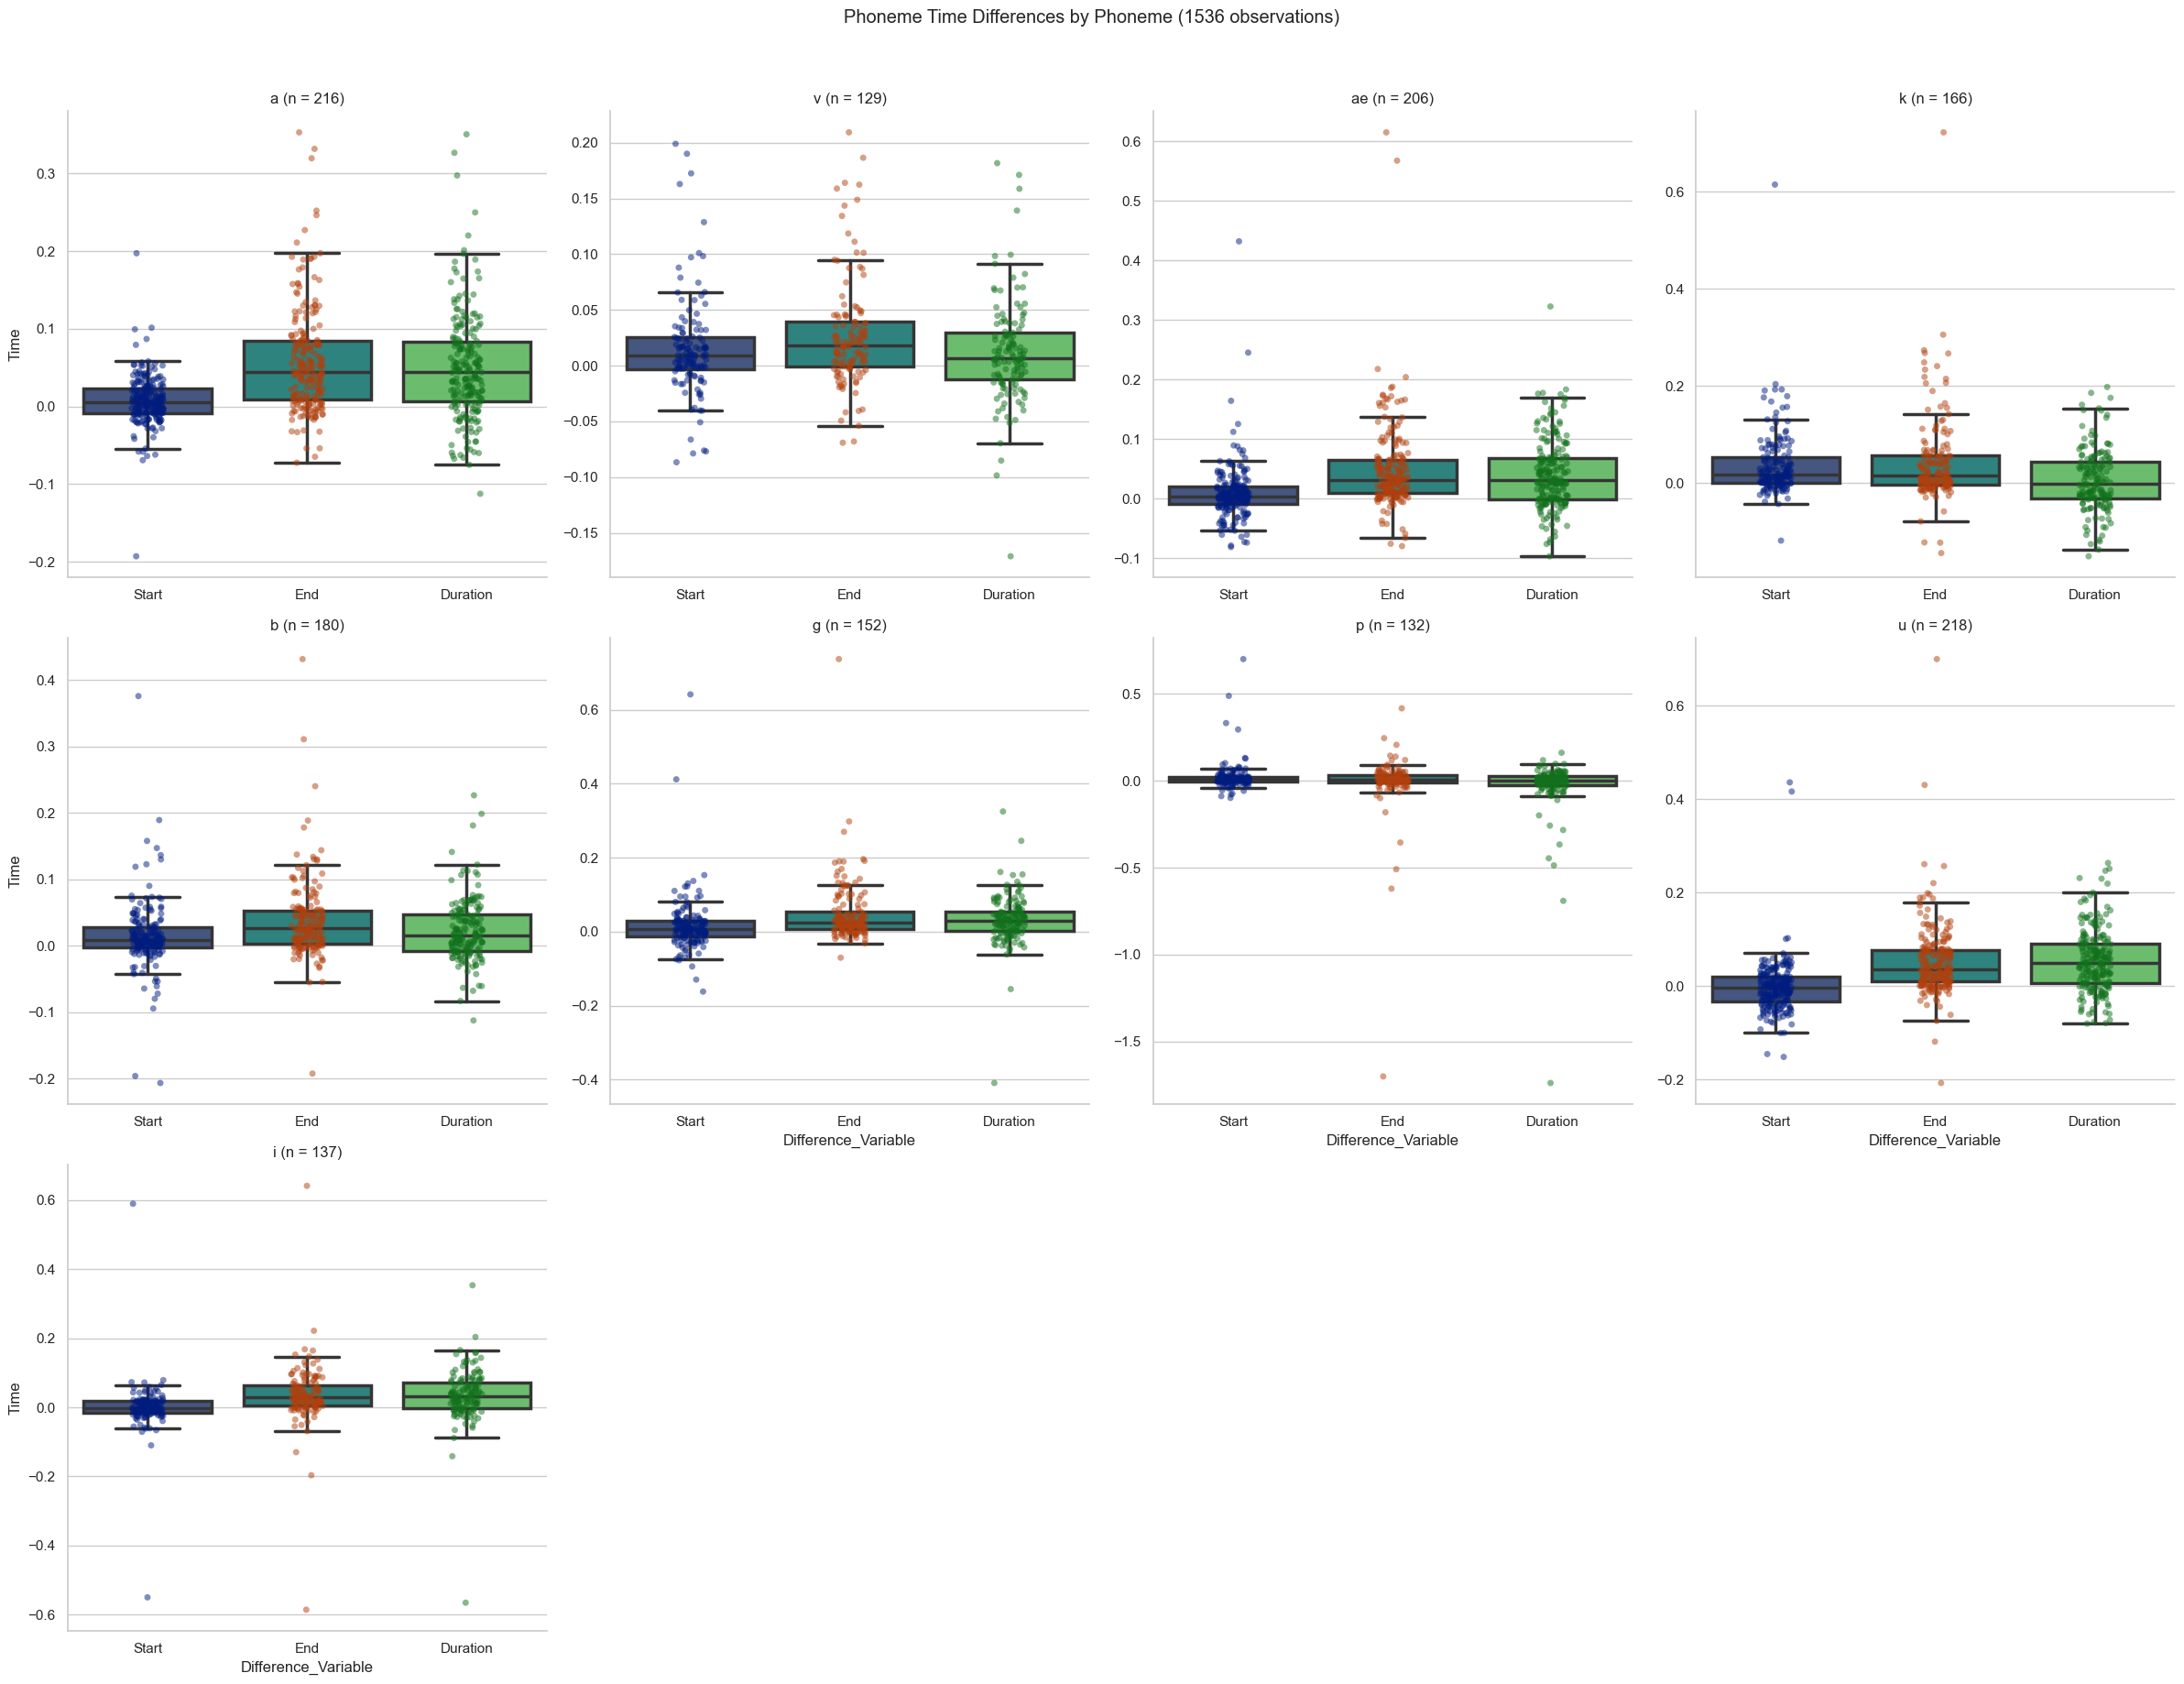

In [86]:
# facet grid for phonemes that's it 

facet = sns.FacetGrid(df_melted, col="Phoneme", sharex=False, sharey=False, height=6, aspect=1, col_wrap=4)
measurements_order = ["Start", "End", "Duration"]
hue_order = ["Start", "End", "Duration"]
facet.map_dataframe(sns.boxplot, x = "Difference_Variable", y = "Time", hue="Difference_Variable", dodge=False, 
                    palette="viridis", showfliers=False, order=measurements_order, hue_order=hue_order)
facet.map_dataframe(sns.stripplot, x = "Difference_Variable", y = "Time", hue="Difference_Variable", dodge=False,
                    palette="dark", jitter = True, alpha = 0.5, order=measurements_order, hue_order=hue_order)

# get counts for each phoneme
phoneme_counts = final_df.groupby("Phoneme").size().reset_index(name="Count").to_dict()
#print(phoneme_counts)
# the dictionary now is ugly, let's make it pretty
phoneme_counts = {k: v for k, v in zip(phoneme_counts["Phoneme"].values(), phoneme_counts["Count"].values())}
#print(phoneme_counts)
# add count for each facet title
for i, ax in enumerate(facet.axes.flat):
    title = ax.get_title()
    phoneme = title.split("=")[1].strip()

    ax.set_title(f'{phoneme} (n = {phoneme_counts[phoneme]})')


obs = df_melted.shape[0]//3
facet.fig.suptitle(f"Phoneme Time Differences by Phoneme ({obs} observations)", y=1.02)

facet.tight_layout()
plt.savefig(os.path.join(plots_path, "Facetgrid_All_Phonemes.png"))
plt.show()
plt.close()



# The Difference in End Time is more pronounced in the third phoneme, regardless whether V or C

In [87]:
# repeat and now use plotly express leveraging the facet_col and facet_row arguments
color5 = px.colors.qualitative.G10

fig = px.box(df_melted, x="Position", y="Time", facet_col="Difference_Variable", facet_row="V_C", color="Position",
                hover_name='Patient', hover_data=['Phoneme', 'V_C'], points="all", color_discrete_sequence=color5).update_traces(marker=dict(size=2, opacity=0.5), boxmean=True,
                                                                                                        jitter=0.3)
fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=800, 
                    width=2000, 
                    font=dict(size=15))
# remove the word "Difference" from the facet_col title and facet_row title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# also let's add the count of each combination of type and position 
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()


In [88]:
print(df_melted.Position.unique())

['P1' 'P2' 'P3']


## Does Position modulate V_C differences regardless of difference variable?

In [89]:
## Does Position modulate V_C differences regardless of difference variable?
# first plot 

fig = px.box(df_melted, x="Position", y="Time", color="V_C", hover_name='Patient', hover_data=['Phoneme', 'Difference_Variable'], points="all",
            color_discrete_sequence=color5).update_traces(marker=dict(size=2, opacity=0.5), boxmean=True, jitter=0.3)
# fix the order of the Position
fig.update_xaxes(categoryorder='array', categoryarray=['P1', 'P2', 'P3'])
fig.update_layout(title=f"Phoneme Time Differences (Differences Collapsed) ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=True, 
                    height=600, 
                    width=1200, 
                    font=dict(size=15))
# remove the word "Difference" from the facet_col title and facet_row title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# also let's add the count of each combination of type and position
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="", range=[-0.5, 0.5])
fig.show()

# AnovaRM now 

model = AnovaRM(df_melted, depvar="Time", subject="Patient", within=["Position", "V_C"], aggregate_func='mean')
results = model.fit()
print(f"{'='*10} ANOVA with Position, V/C, and the interaction between them {'='*10}")
print(results)




========== ANOVA with Position, V/C, and the interaction between them ==========
                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
Position     29.0902 2.0000 6.0000 0.0008
V_C           6.4203 1.0000 3.0000 0.0851
Position:V_C  0.5680 2.0000 6.0000 0.5944



c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:511: FutureWarning:

The provided callable <function mean at 0x000002A13E717BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



In [90]:
# let's see this interaction for each difference variable

for diffi in df_melted['Difference_Variable'].unique():
    df_diff = df_melted[df_melted['Difference_Variable'] == diffi]
    model = AnovaRM(df_diff, depvar="Time", subject="Patient", within=["Position", "V_C"], aggregate_func='mean')
    results = model.fit()
    print(f"{'='*10} ANOVA {diffi} {'='*10}")
    print(results)

========== ANOVA Start ==========
                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
Position      5.8920 2.0000 6.0000 0.0384
V_C           4.0211 1.0000 3.0000 0.1386
Position:V_C  0.7435 2.0000 6.0000 0.5147

========== ANOVA End ==========
                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
Position     29.0902 2.0000 6.0000 0.0008
V_C           6.4203 1.0000 3.0000 0.0851
Position:V_C  0.5680 2.0000 6.0000 0.5944

========== ANOVA Duration ==========
                  Anova
             F Value Num DF Den DF Pr > F
-----------------------------------------
Position     18.5326 2.0000 6.0000 0.0027
V_C           6.3741 1.0000 3.0000 0.0858
Position:V_C  1.5032 2.0000 6.0000 0.2957



c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:511: FutureWarning:

The provided callable <function mean at 0x000002A13E717BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:511: FutureWarning:

The provided callable <function mean at 0x000002A13E717BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:511: FutureWarning:

The provided callable <function mean at 0x000002A13E717BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string 

In [91]:

colors8 = px.colors.qualitative.Set1
fig = px.box(df_melted, x="Position", y="Time", facet_col="Difference_Variable", color="V_C",
                hover_name='Patient', hover_data=['Phoneme', 'V_C'], points="all", color_discrete_sequence=[colors8[7], colors8[1]]).update_traces(marker=dict(size=2, opacity=0.5), boxmean=True,
                                                                                                        jitter=0.3)
# specify order of positions
fig.update_xaxes(categoryorder="array", categoryarray=['P1', 'P2', 'P3'])
fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=600, 
                    width=1200, 
                    font=dict(size=15))
# remove the word "Difference" from the facet_col title and facet_row title
# also let's add the count of each combination of type and position
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="", range=[-0.3, 0.3])
# add legend
fig.update_layout(legend_title_text='Type', showlegend=True)
fig.show()







In [92]:
print(df_melted.shape)
print(df_melted.head())


(4608, 6)
    Patient Phoneme Position        V_C Difference_Variable      Time
441     S22       a       P1      Vowel               Start  0.002100
442     S22       v       P2  Consonant               Start  0.018900
443     S22      ae       P3      Vowel               Start -0.006167
444     S22       k       P1  Consonant               Start  0.026900
445     S22       a       P2      Vowel               Start -0.002133


In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM

df_melted['Position'] = df_melted['Position'].astype('category')
df_melted['V_C'] = df_melted['V_C'].astype('category')
df_melted['Difference_Variable'] = df_melted['Difference_Variable'].astype('category')
df_melted['Patient'] = df_melted['Patient'].astype('category')

diffs = df_melted['Difference_Variable'].unique()

for diff in diffs:
    data = df_melted[df_melted['Difference_Variable'] == diff]
    # two way anova with repeated measures
    model = AnovaRM(data, depvar='Time', subject='Patient', within=['Position', 'V_C'], aggregate_func='mean')
    results = model.fit().anova_table
    print(f"Results for {diff}")
    print(results)
    print("\n\n\n")

# what if difference is also a within factor

model = AnovaRM(df_melted, depvar='Time', subject='Patient', within=['Position', 'V_C', 'Difference_Variable'], aggregate_func='mean')
results = model.fit().anova_table
print("Anova with Difference_Variable as a within factor")
print(results)
print("\n\n\n")

model = smf.mixedlm('Time ~ C(Position) + C(V_C) + C(Difference_Variable) + C(Position):C(V_C) + C(Position):C(Difference_Variable) + C(V_C):C(Difference_Variable) + C(Position):C(V_C):C(Difference_Variable)', groups = df_melted["Patient"], data=df_melted).fit()
print(model.summary())

# repeat but we don't care about the difference

model = smf.mixedlm('Time ~ C(Position) + C(V_C) + C(Position):C(V_C)', groups = df_melted["Patient"], data=df_melted).fit()
print(model.summary())

# repeat but make it type position insetad

model = smf.mixedlm('Time ~ C(V_C) + C(Position) + C(V_C):C(Position)', groups = df_melted["Patient"], data=df_melted).fit()
print(model.summary())

Results for Start
               F Value  Num DF  Den DF    Pr > F
Position      5.892021     2.0     6.0  0.038403
V_C           4.021121     1.0     3.0  0.138616
Position:V_C  0.743499     2.0     6.0  0.514672




Results for End
                F Value  Num DF  Den DF    Pr > F
Position      29.090189     2.0     6.0  0.000817
V_C            6.420286     1.0     3.0  0.085138
Position:V_C   0.568039     2.0     6.0  0.594395




Results for Duration
                F Value  Num DF  Den DF    Pr > F
Position      18.532600     2.0     6.0  0.002704
V_C            6.374068     1.0     3.0  0.085823
Position:V_C   1.503184     2.0     6.0  0.295668




Anova with Difference_Variable as a within factor
                                    F Value  Num DF  Den DF    Pr > F
Position                          29.090189     2.0     6.0  0.000817
V_C                                6.420286     1.0     3.0  0.085138
Difference_Variable               19.622182     2.0     6.0  0.002332
Positio

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:509: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:511: FutureWarning:

The provided callable <function mean at 0x000002A13E717BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\stats\anova.py:509: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

c:\Us

                   Mixed Linear Model Regression Results
Model:                   MixedLM        Dependent Variable:        Time     
No. Observations:        4608           Method:                    REML     
No. Groups:              4              Scale:                     0.0061   
Min. group size:         468            Log-Likelihood:            5182.3178
Max. group size:         1395           Converged:                 Yes      
Mean group size:         1152.0                                             
----------------------------------------------------------------------------
                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------
Intercept                          0.010    0.007  1.461 0.144 -0.003  0.023
C(Position)[T.P2]                 -0.001    0.004 -0.371 0.710 -0.009  0.006
C(Position)[T.P3]                  0.027    0.004  6.773 0.000  0.019  0.035
C(V_C)[T.Vowel]    

c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning:

The MLE may be on the boundary of the parameter space.



In [94]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import AnovaRM

# let's do a post hoc for the significant pvalues
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print("Post hoc for Position")
tukey = pairwise_tukeyhsd(endog=df_melted['Time'], groups=df_melted['Position'], alpha=0.05)
print(tukey.summary())
print("\n\n\n")
print("Post hoc for Type")
tukey = pairwise_tukeyhsd(endog=df_melted['Time'], groups=df_melted['V_C'], alpha=0.05)
print(tukey.summary())
print("\n\n\n")
print("Post hoc for Difference")
tukey = pairwise_tukeyhsd(endog=df_melted['Time'], groups=df_melted['Difference_Variable'], alpha=0.05)
print(tukey.summary())
print("\n\n\n")



Post hoc for Position
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    P1     P2  -0.0016 0.8394 -0.0083 0.0051  False
    P1     P3   0.0311    0.0  0.0244 0.0378   True
    P2     P3   0.0327    0.0   0.026 0.0394   True
---------------------------------------------------




Post hoc for Type
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
  group1  group2 meandiff p-adj lower  upper  reject
----------------------------------------------------
Consonant  Vowel   0.0123   0.0 0.0077 0.0169   True
----------------------------------------------------




Post hoc for Difference
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
Duration    End   0.0127   0.0   0.006  0.0194   True
Duration  Start  -0.0155   0.0 -0.0222 -0.0088   True
     End  Start  -0.0282   0.

In [95]:
# for every position, do a pairwise tukeyhsd for type

positions = df_melted['Position'].unique()

for position in positions:
    data = df_melted[df_melted['Position'] == position]
    tukey = pairwise_tukeyhsd(endog=data['Time'], groups=data['V_C'], alpha=0.05)
    print(f"Post hoc for {position}")
    print(tukey.summary())
    print("\n\n\n")

Post hoc for P1
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
  group1  group2 meandiff p-adj  lower  upper  reject
-----------------------------------------------------
Consonant  Vowel   0.0097 0.0019 0.0036 0.0157   True
-----------------------------------------------------




Post hoc for P2
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
  group1  group2 meandiff p-adj  lower  upper  reject
-----------------------------------------------------
Consonant  Vowel   0.0099 0.0009 0.0041 0.0157   True
-----------------------------------------------------




Post hoc for P3
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
  group1  group2 meandiff p-adj  lower  upper  reject
-----------------------------------------------------
Consonant  Vowel   0.0171 0.0018 0.0064 0.0278   True
-----------------------------------------------------






In [96]:
voiced_phonemes = ['b', 'd', 'g', 'v', 'z', 'm', 'n', 'l', 'r', 'w', 'y']   
voiceless_phonemes = ['p', 't', 'k', 'f', 's', 'h']
vowels = ['a', 'e', 'i', 'o', 'u']

df_melted['Voicing'] = df_melted['Phoneme'].apply(lambda x: "Voiceless" if x in voiceless_phonemes else "Voiced")

# plot 

fig = px.box(df_melted, x="Voicing", y="Time", facet_col="Difference_Variable", color="Voicing",
                hover_name='Patient', hover_data=['Phoneme', 'V_C'], points="all", color_discrete_sequence=color5).update_traces(marker=dict(size=2, opacity=0.5), boxmean=True,
                                                                                                        jitter=0.3)
fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=800, 
                    width=2000, 
                    font=dict(size=15))
# remove the word "Difference" from the facet_col title and facet_row title
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# also let's add the count of each combination of type and position
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
fig.show()


c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [97]:

# do mixed effects model for voicing    

import statsmodels.formula.api as smf

# convert to categorical

df_melted['Voicing'] = df_melted['Voicing'].astype('category')
df_melted['Difference_Variable'] = df_melted['Difference_Variable'].astype('category')
df_melted['V_C'] = df_melted['V_C'].astype('category')
df_melted['Position'] = df_melted['Position'].astype('category')

model = smf.mixedlm("Time ~ Voicing", df_melted, groups=df_melted["Patient"], re_formula="~Voicing")
results = model.fit()
results.summary()




c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning:

The MLE may be on the boundary of the parameter space.



<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Mixed Linear Model Regression Results
===========================================================================
Model:                    MixedLM       Dependent Variable:       Time     
No. Observations:         4608          Method:                   REML     
No. Groups:               4             Scale:                    0.0063   
Min. group size:          468           Log-Likelihood:           5120.0703
Max. group size:          1395          Converged:                Yes      
Mean group size:          1152.0                                           
---------------------------------------------------------------------------
                                 Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------
Intercept                         0.028    0.007  4.161 0.000  0.015  0.041
Voicing[T.Voiceless]             -0.016    0.006 -2.836 0.005 -0.027 -0.005
Group Var                         0.000    0.002                           
Group x Voicing[T.Voiceless] Cov -0.000    0.001                           
Voicing[T.Voiceless] Var          0.000    0.001                           
===========================================================================

"""

# P is only problematic when it's the third phoneme
# Other phonemes are mostly centered around 0 

In [98]:
# let's see phoneme differences by phoneme and position
color6 = px.colors.qualitative.Antique

fig = px.box(df_melted, x="Position", y="Time", facet_row="Phoneme", facet_col="Difference_Variable", color="Position",
                hover_name='Patient', hover_data=['V_C'], points="all", color_discrete_sequence=color6).update_traces(marker=dict(size=5, opacity=0.5), boxmean=True,
                                                                                                        jitter=0.3)
fig.update_layout(title=f"Phoneme Time Differences ({df_melted.shape[0]//3} observations)",
                    yaxis_title="Time (s)",
                    showlegend=False, 
                    height=5000, 
                    width=2900, 
                    font=dict(size=25))
# remove the word "Difference" from the facet_col title and facet_row title and # make column title on the left 
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# also let's add the count of each combination of type and position
fig.update_xaxes(title_text="")
fig.update_yaxes(title_text="")
# make the facet_col title on the left
fig.show()


c:\Users\amh209\AppData\Local\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

